In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import is_numeric_dtype
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read data

data = pd.read_csv("weatherHistory.csv")
data.shape

(96453, 12)

In [3]:
data.columns
data = data.drop(['Formatted Date', 'Summary', 'Precip Type',
       'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'], axis=1)

In [4]:
#getting data types of features
data.dtypes

Temperature (C)    float64
Humidity           float64
dtype: object

In [5]:
data.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


In [6]:
#rename the Temperature column with Temp.
data.rename(columns= {"Temperature (C)": "Temperature"}, inplace=True)

In [7]:
data.describe()

,Temperature,Humidity
count,96453.000000,96453.000000
mean,11.932678,0.734899
std,9.551546,0.195473
min,-21.822222,0.000000
25%,4.688889,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.905556,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
Temperature    96453 non-null float64
Humidity       96453 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [9]:
#converting celcius into farenheit
data['Temperature'] = (data['Temperature'] * 9/5) + 32

In [10]:
# Check the null values in the dataset
data.isnull().any()

Temperature    False
Humidity       False
dtype: bool

In [11]:
data.head()

,Temperature,Humidity
0,49.05,0.89
1,48.84,0.86
2,48.88,0.89
3,46.92,0.83
4,47.76,0.83


In [12]:
# Replace the nan values with median of column 'Temp'
data['Temperature'] = data['Temperature'].replace(0, np.NaN)

In [13]:
# Replace the nan values with median of column 'Temp'
data['Humidity'] = data['Humidity'].replace(0, np.NaN)

In [14]:
# Check the null values in the dataset
data.isnull().any()

Temperature    False
Humidity        True
dtype: bool

In [15]:
data['Humidity'] = data['Humidity'].replace(np.NaN, data['Humidity'].mean())
data['Temperature'] = data['Temperature'].replace(np.NaN, data['Temperature'].mean())

In [16]:
data.isnull().any()

Temperature    False
Humidity       False
dtype: bool

In [17]:
data.duplicated().sum()

37368

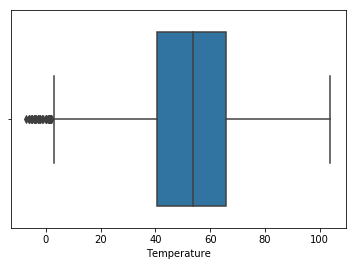

In [18]:
# Boxplot to find the outliers in the Temp column
sb.boxplot(data['Temperature'])

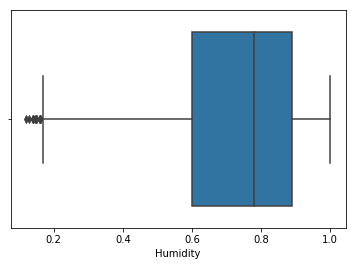

In [19]:
# Boxplot to find the outliers in the Temp column
sb.boxplot(data['Humidity'])

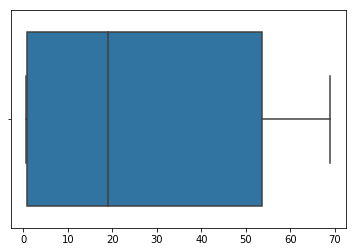

In [22]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    low = .20
    high = .80
    quant_df = data.quantile([low, high])
    for name in list(data.columns):
        if is_numeric_dtype(data[name]):
            data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
    return data

data = remove_outlier(data)
sb.boxplot(data)

(array([2035., 1932., 2946., 3199., 3626., 3022., 5386., 5835., 4971.,
        5436.]),
 array([0.56 , 0.595, 0.63 , 0.665, 0.7  , 0.735, 0.77 , 0.805, 0.84 ,
        0.875, 0.91 ]),
 <a list of 10 Patch objects>)

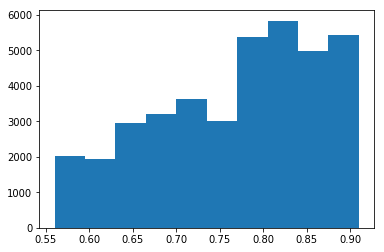

In [23]:
# Histrogram of the feature varibale
plt.hist(data['Humidity'])

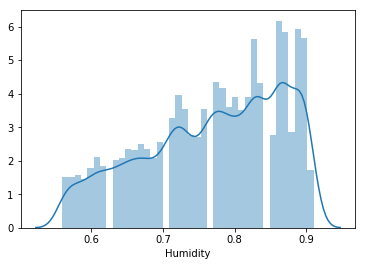

In [24]:
# Distplot of the feature varibale
sb.distplot(data['Humidity'])

In [25]:
# Mean and median of the Humidity column 
print("Mean is", data['Humidity'].mean(), data['Humidity'].skew(), ", Median is ", data['Humidity'].median())

Mean is 0.7687998853808878 -0.4316725059790226 , Median is  0.78


Skewness is -0.2550198356706362
0.6002835287069406 0.6084


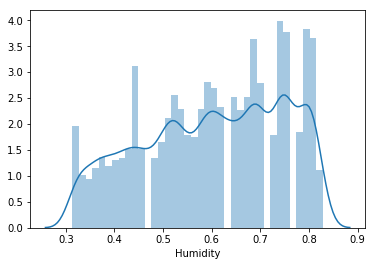

In [26]:
# now transforming feature variable
target = (np.square((data['Humidity'])))
print ('Skewness is', target.skew())
sb.distplot(target)
print(target.mean(), target.median())
data['Humidity'] = target

(array([2794., 3831., 4484., 3569., 4080., 4489., 4090., 3152., 4424.,
        3475.]),
 array([37.1  , 40.289, 43.478, 46.667, 49.856, 53.045, 56.234, 59.423,
        62.612, 65.801, 68.99 ]),
 <a list of 10 Patch objects>)

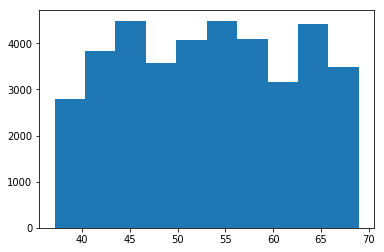

In [27]:
# Histrogram of the target varibale
plt.hist(data['Temperature'])

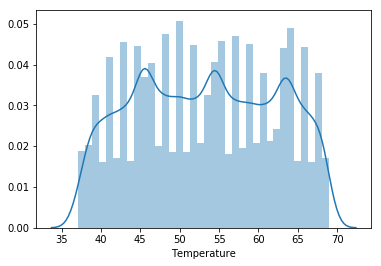

In [28]:
# Distplot of the feature varibale
sb.distplot(data['Temperature'])

In [29]:
print("Mean is", data['Temperature'].mean(), ", Median is ", data['Temperature'].median(), data['Temperature'].skew())

Mean is 53.242765708033225 , Median is  53.68 -0.0012836200780655673


Skewness is 0.2078260697744959
2911.993271238449 2881.5424


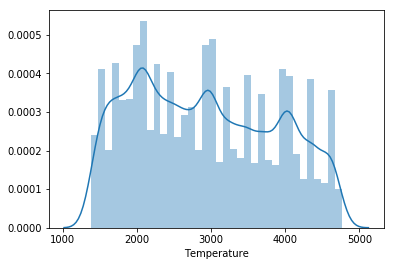

In [30]:
# now transforming feature variable
target = (np.square((data['Temperature'])))
print ('Skewness is', target.skew())
sb.distplot(target)
print(target.mean(), target.median())
data['Temperature'] = target

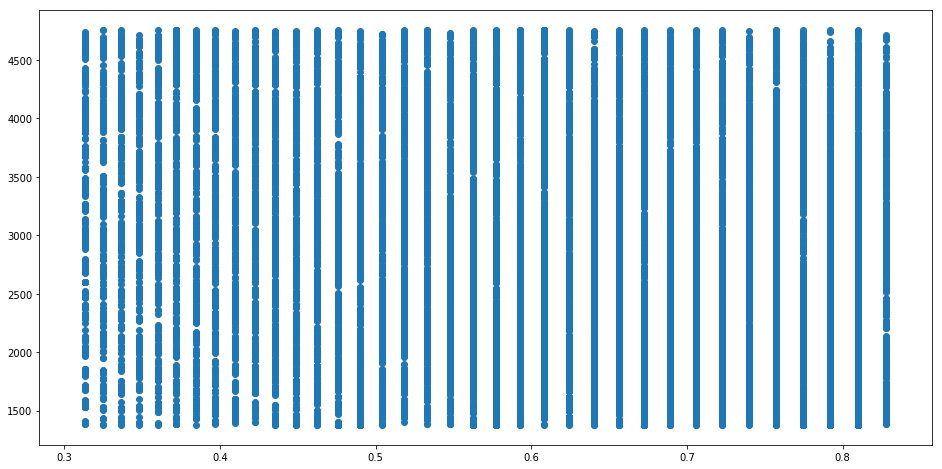

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Humidity'], data['Temperature'])
plt.show()

In [ ]:
class LinearRegression:

    def __init__(self):
        self.alpha = 0.001
        self.echops = 1500

    def gradient_descent(self, x_train_data, y_train_data, theta0 = 1, theta1 = 0):
        N = len(y_train_data)

        for i in range(self.echops):
            y_curr_data = (theta0 * x_train_data) + theta1

            cost = sum([data ** 2 for data in (y_train_data - y_curr_data)]) / N

            intercept_grad = (-2 / N) * sum(y_train_data - y_curr_data)
            slope_grad = (-2 / N) * sum(x_train_data * (y_train_data - y_curr_data))

            theta0 -= self.alpha * slope_grad
            theta1 -= self.alpha * intercept_grad

        return theta0, theta1, cost

    def test(self, x_test_data, theta0, theta1):
         y_pred = np.array([])
         for i in range(len(x_test_data)):
             y_pred_val = theta0 + theta1 * x_test_data[i]
             y_pred = np.append(y_pred, y_pred_val)

         return y_pred

    def accuracy(self, y_test_data, y_pred):
         total_error = 0
         for i in range(len(y_test_data)):
             total_error += (abs((y_pred[i] - y_test_data[i]) / y_test_data[i]))

         total_error = total_error / len(y_test_data)
         accuracy = (1 - total_error) * 100

         return accuracy

    def feature_scaling(self, x_data):
        result = np.array([])
        for i in range(len(x_data)):
            x_std = (x_data[i] - np.mean(x_data)) / np.std(x_data)
            result = np.append(x_std, result)
        return result
    
    def plotgraph(self, x_data_test, y_data_test, y_pred, x_data_train, y_data_train):
        plt.scatter(x_data_train, y_data_train, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()
        plt.scatter(x_data_test, y_data_test, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()


def main():
    lr = LinearRegression()

    
    train_size = int(np.ceil((len(data) * 0.8)))
    test_size = int(len(data) - train_size)
    
    x_train_data = np.array(data["Humidity"][:train_size])
    y_train_data = np.array(data["Temperature"][:train_size])
    
    x_test_data = np.array(data["Humidity"][train_size:])
    y_test_data = np.array(data["Temperature"][train_size:])

    
    theta_0_arr, theta_1_arr, cost_arr = lr.gradient_descent(x_train_data, y_train_data)
    print(theta_0_arr, theta_1_arr)
    
    y_pred = lr.test(x_test_data, theta_0_arr, theta_1_arr)
    
    accuracy = lr.accuracy(y_test_data, y_pred)
    print("Accuracy is ", accuracy)
    
    lr.plotgraph(x_test_data, y_test_data, y_pred, x_train_data, y_train_data)    
    print("Test data accuracy ", accuracy)    


if __name__ == '__main__':
    main()